# Yelp Data

Import the python scientific suite

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

In [2]:
file_dir = '/Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/'

In [37]:
b = pd.read_csv(file_dir + 'yelp_academic_dataset_business.csv') #b for business

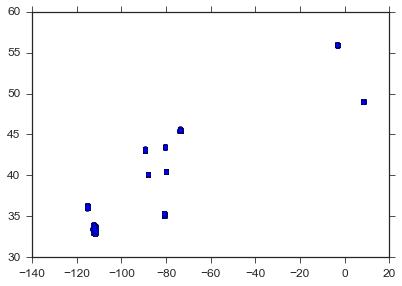

In [28]:
plt.scatter(b['longitude'],b['latitude'])

(array([   911.,   1603.,   3312.,   6626.,      0.,   9988.,  15468.,
         16142.,  12226.,  11169.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

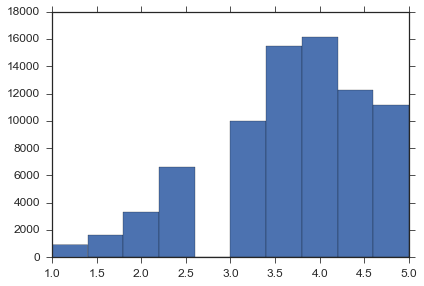

In [29]:
plt.hist(b['stars'])

In [30]:
b['name']

0                                              Mr Hoagie
1                                           Clancy's Pub
2                                       Joe Cislo's Auto
3                               Cool Springs Golf Center
4                                                Verizon
5                                          Emil's Lounge
6                                      Extreme Fitness 2
7                                  Alexion's Bar & Grill
8                          Flynn's Tire And Auto Service
9                       Forsythe Miniature Golf & Snacks
10                             Quaker State Construction
11                               Greentree Animal Clinic
12                                 Carnegie Free Library
13                                    Advance Auto Parts
14                               Kings Family Restaurant
15                                          Shop N' Save
16                            Rossi Tailoring & Cleaners
17                             

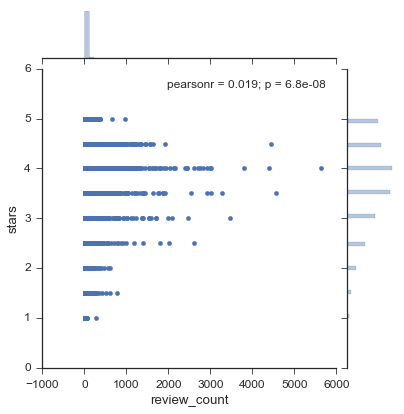

In [38]:
sns.jointplot(b['review_count'], b['stars'])